In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import pandas_profiling as ppf
import warnings##忽略警告
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('ggplot')

import os
import sys
# os.chdir设置之后，os.path也会变为该路径
os.chdir(r"E:\soft\Anaconda\Anaconda_Python3.6_code\data_analysis\100_Data_analysis_competition\1_kaggle\9_Predict Future Sales\data")

# print(sys.path)
BASE_DIR = os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath(os.getcwd())))))
print(BASE_DIR)
sys.path.insert(0, os.path.join(BASE_DIR, "101_Sklearn\\7_SVM"))
print(sys.path)

import FeatureTools as ft

E:\soft\Anaconda\Anaconda_Python3.6_code\data_analysis
['E:\\soft\\Anaconda\\Anaconda_Python3.6_code\\data_analysis\\101_Sklearn\\7_SVM', 'e:\\soft\\anaconda\\anaconda_python3.6\\python36.zip', 'e:\\soft\\anaconda\\anaconda_python3.6\\DLLs', 'e:\\soft\\anaconda\\anaconda_python3.6\\lib', 'e:\\soft\\anaconda\\anaconda_python3.6', '', 'e:\\soft\\anaconda\\anaconda_python3.6\\lib\\site-packages', 'e:\\soft\\anaconda\\anaconda_python3.6\\lib\\site-packages\\pip-19.1-py3.6.egg', 'e:\\soft\\anaconda\\anaconda_python3.6\\lib\\site-packages\\win32', 'e:\\soft\\anaconda\\anaconda_python3.6\\lib\\site-packages\\win32\\lib', 'e:\\soft\\anaconda\\anaconda_python3.6\\lib\\site-packages\\Pythonwin', 'e:\\soft\\anaconda\\anaconda_python3.6\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\dell\\.ipython']


In [2]:
train = ft.readFile_inputData('sales_train.csv')
print(train.shape)
test = ft.readFile_inputData('test.csv')
print(test.shape)
shops = ft.readFile_inputData('shops.csv')
print(shops.shape)
items = ft.readFile_inputData('items.csv')
print(items.shape)
cats = ft.readFile_inputData('item_categories.csv')
print(cats.shape)

(2935849, 6)
(214200, 3)
(60, 2)
(22170, 3)
(84, 2)


In [3]:
display(train.head())
display(test.head())
display(shops.head())
display(items.head())
display(cats.head())

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [4]:
train_new = train.merge(shops, on='shop_id')
train_new = train_new.merge(items, on='item_id')
train_new = train_new.merge(cats, on='item_category_id')
train_new.drop('item_category_id', axis=1, inplace=True)
print(train_new.shape)
train_new.head()

(2935849, 9)


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_name
0,02.01.2013,0,59,22154,999.0,1.0,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),Кино - Blu-Ray
1,02.01.2013,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),Кино - Blu-Ray
2,03.01.2013,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),Кино - Blu-Ray
3,20.01.2013,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),Кино - Blu-Ray
4,23.01.2013,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),Кино - Blu-Ray


In [5]:
mis_val_table_ren_columns = ft.missing_values_table(train_new)
mis_val_table_ren_columns

Your selected dataframe has 9 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [6]:
print(train_new.shape)
ft.duplicate_value(train_new, inplace=True)

(2935849, 9)
去除重复项后长度：2935843(按行统计)
去除重复项后长度：2935843(按行统计)
重复项长度：6(按行统计)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935843 entries, 0 to 2935842
Data columns (total 9 columns):
date                  object
date_block_num        int64
shop_id               int64
item_id               int64
item_price            float64
item_cnt_day          float64
shop_name             object
item_name             object
item_category_name    object
dtypes: float64(2), int64(3), object(4)
memory usage: 201.6+ MB
None


In [7]:
ft.duplicate_value(train_new)

去除重复项后长度：2935843(按行统计)
去除重复项后长度：2935843(按行统计)
重复项长度：0(按行统计)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935843 entries, 0 to 2935842
Data columns (total 9 columns):
date                  object
date_block_num        int64
shop_id               int64
item_id               int64
item_price            float64
item_cnt_day          float64
shop_name             object
item_name             object
item_category_name    object
dtypes: float64(2), int64(3), object(4)
memory usage: 201.6+ MB
None


In [8]:
type(train_new.loc[0,"date"])

str

In [9]:
ft.standardScaler_outlier(train_new, "item_cnt_day")

outer range (low) of the distribution:
[[-8.87517803]
 [-6.58408437]
 [-3.91114178]
 [-2.76559495]
 [-2.76559495]
 [-2.38374601]
 [-2.38374601]
 [-2.38374601]
 [-2.38374601]
 [-2.00189707]]

outer range (high) of the distribution:
[[191.97736557]
 [193.50476134]
 [195.03215711]
 [203.05098489]
 [205.34207855]
 [237.79923863]
 [242.76327488]
 [254.98244103]
 [381.3744409 ]
 [827.75585433]]


In [10]:
ft.standardScaler_outlier(train_new, "item_price")

outer range (low) of the distribution:
[[-0.51558154]
 [-0.51496297]
 [-0.51496297]
 [-0.51495285]
 [-0.51495141]
 [-0.51494562]
 [-0.51494562]
 [-0.51494562]
 [-0.51494562]
 [-0.51494562]]

outer range (high) of the distribution:
[[ 23.75946471]
 [ 23.76524572]
 [ 24.33756588]
 [ 24.33756588]
 [ 24.33756588]
 [ 24.33756588]
 [ 28.26402903]
 [ 28.96757816]
 [ 33.70858586]
 [177.52859504]]



 mu = 1.24 and sigma = 2.62

nan


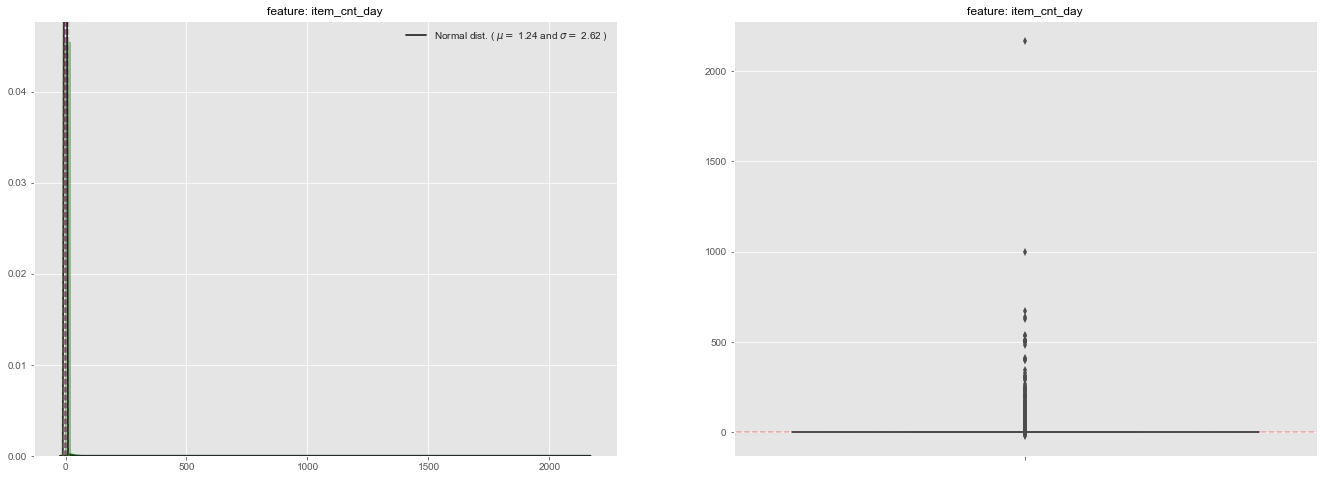

In [11]:
f, axes = plt.subplots(1,2, figsize=(23, 8))
ft.con_data_distribution(train_new, "item_cnt_day", axes)


 mu = 890.85 and sigma = 1729.80

0.13333333333333333


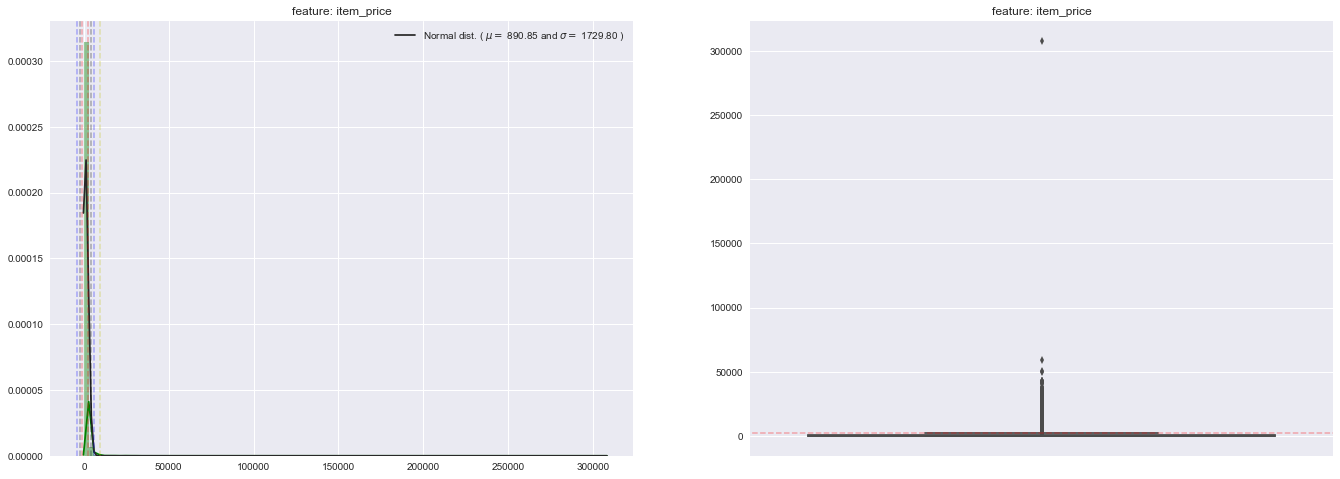

In [12]:
f, axes = plt.subplots(1,2, figsize=(23, 8))
ft.con_data_distribution(train_new, "item_price", axes)

In [13]:
##先对每日销售的产品数量进行修改
train_new = train_new[train_new.item_cnt_day <= 1000]
train_new = train_new[train_new.item_cnt_day > 0]
##再对产品的销售价格进行修改
train_new = train_new[train_new.item_price < 100000]
train_new = train_new[train_new.item_price > 1]
train_new.shape

(2923831, 9)

In [14]:
# 数据重做--聚焦于item_cnt_month
train_new['date']= pd.to_datetime(train_new['date'], format='%d.%m.%Y')
print(type(train_new['date']), train_new['date'].dtypes, train_new.loc[0,'date'], type(train_new.loc[0,'date']))

<class 'pandas.core.series.Series'> datetime64[ns] 2013-01-02 00:00:00 <class 'pandas._libs.tslib.Timestamp'>


In [27]:
# 将数据转换为月度销售数据
# 制作仅包含月度销售数据的数据集：groupby(年Y-月m, item_id, shop_id)
data = train_new.groupby([train_new['date'].map(lambda x: x.strftime('%Y-%m')),'item_id','shop_id']).sum() # 非标准的DataFrame
print(data.head(10), type(data))

data = data.reset_index() # 必须进行reset_index()变为标准的DataFrame
print(data.head(10), type(data))

                         date_block_num  item_price  item_cnt_day
date    item_id shop_id                                          
2013-01 19      25                    0        28.0           1.0
        27      1                     0      1890.0           1.0
                2                     0      2499.0           1.0
                10                    0      1890.0           1.0
                19                    0      2499.0           1.0
                26                    0      2499.0           1.0
                31                    0      2499.0           1.0
                45                    0      2499.0           1.0
        28      15                    0       549.0           1.0
                31                    0      1647.0           3.0 <class 'pandas.core.frame.DataFrame'>
      date  item_id  shop_id  date_block_num  item_price  item_cnt_day
0  2013-01       19       25               0        28.0           1.0
1  2013-01       27        1

In [29]:
# 指定我们要添加到数据的重要属性
data = data[['date','item_id','shop_id','item_cnt_day']]
data.head()

,date,item_id,shop_id,item_cnt_day
0,2013-01,19,25,1.0
1,2013-01,27,1,1.0
2,2013-01,27,2,1.0
3,2013-01,27,10,1.0
4,2013-01,27,19,1.0


In [34]:
# 最后，我们可以从数据集中选择重要的特定属性
data = data.pivot_table(index=['item_id','shop_id'], columns = 'date', values = 'item_cnt_day', fill_value = 0).reset_index()
print(data.shape)
data.head()

(423681, 36)


date,item_id,shop_id,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,...,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10
0,0,54,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,55,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,54,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,54,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,54,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
# 数据进行组合：test
display(test.head())

test = pd.merge(test, data, on = ['item_id', 'shop_id'], how = 'left')
# 将空值填充为0
test.fillna(0, inplace = True)
print(test.shape) # (214200, 37)
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


,ID,shop_id,item_id,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,...,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10
0,0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
# 创建实际的训练集
# 它这里使用test作为训练集的意思：原始test中的shop_id	item_id，在原始train中不一定有，所以上面才 test = pd.merge(test, data
x_train = test.drop(['2015-10', 'item_id', 'shop_id'], axis = 1)##和咱们提交格式有关
y_train = test['2015-10']

# 删除第一列，以便它可以预测未来的销售数据
x_test = test.drop(['2013-01', 'item_id', 'shop_id'], axis = 1)#保持和训练集一样的特征数

print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)

(214200, 37)


In [ ]:
# 用GradientBoostingRegressor进行预测
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor()
GBR.fit(x_train, y_train)
mode2 = GBR.predict(x_test).clip(0,20)##把预测之后的值限定在0到20之间
joblib.dump(GBR, 'GBR2.pkl')##模型的保存

In [ ]:
mode2=pd.DataFrame(mode2,columns=['item_cnt_month'])

In [ ]:
# mode2.to_csv('submission.csv',index_label='ID')